# **Phase 3**

#### Sama Amr -- 900211296  & Farida Madkour -- 900211360

In [ ]:
import warnings
warnings.filterwarnings('ignore')
###

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bankloan.csv to bankloan.csv


In [ ]:
df = pd.read_csv("bankloan.csv")
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,Education,Securities.Account,CD.Account,Online,CreditCard,CCAvg,Mortgage,Personal.Loan
0,1,25,1,49,91107,4,1,1,0,0,0,1.6,0,0
1,2,45,19,34,90089,3,1,1,0,0,0,1.5,0,0
2,3,39,15,11,94720,1,1,0,0,0,0,1.0,0,0
3,4,35,9,100,94112,1,2,0,0,0,0,2.7,0,0
4,5,35,8,45,91330,4,2,0,0,0,1,1.0,0,0


In [ ]:
df.info()
print("--------------------------------")
print("List of Columns:", df.columns)
print("Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   Education           5000 non-null   int64  
 7   Securities.Account  5000 non-null   int64  
 8   CD.Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
 11  CCAvg               5000 non-null   float64
 12  Mortgage            5000 non-null   int64  
 13  Personal.Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
--------------------------------
List of Columns: Index(

<Axes: >

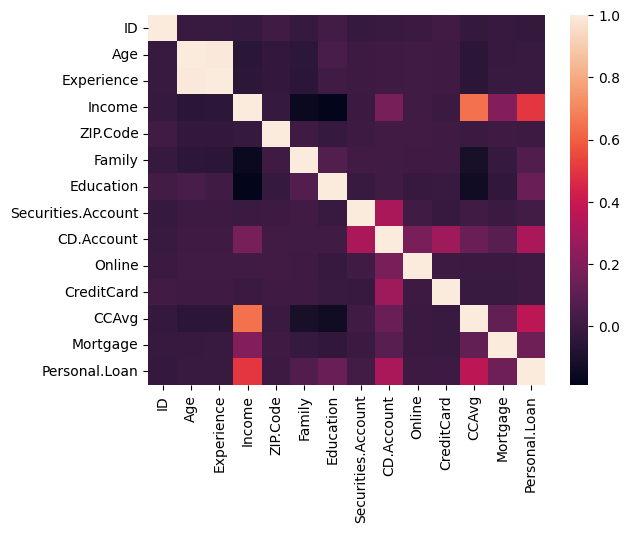

In [ ]:
sns.heatmap(df.corr(), annot=False)

Drop ID, experience, and Zip Code columns since they're irrelevant

In [ ]:
df = df.drop(columns=['ID','Experience','ZIP.Code'])
df.head()

,Age,Income,Family,Education,Securities.Account,CD.Account,Online,CreditCard,CCAvg,Mortgage,Personal.Loan
0,25,49,4,1,1,0,0,0,1.6,0,0
1,45,34,3,1,1,0,0,0,1.5,0,0
2,39,11,1,1,0,0,0,0,1.0,0,0
3,35,100,1,2,0,0,0,0,2.7,0,0
4,35,45,4,2,0,0,0,1,1.0,0,0


Check for missing values

In [ ]:
df.isnull().sum()

Age                   0
Income                0
Family                0
Education             0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
CCAvg                 0
Mortgage              0
Personal.Loan         0
dtype: int64

Therefore, there is no missing values as specified by the non-null count and the sum calculated

Check for duplicate values and drop them

In [ ]:
df.duplicated().sum()

13

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

###### Encodings

Change numeric/continous variables to type float and categorical/discrete variable to type category

In [ ]:
df['Income']=df['Income'].astype('float')
df['Family']=df['Family'].astype('category')
df['Education']=df['Education'].astype('category')
df['CCAvg']=df['CCAvg'].astype('float')
df['Mortgage']=df['Mortgage'].astype('float')
df['Personal.Loan']=df['Personal.Loan'].astype('category')
df['Securities.Account']=df['Securities.Account'].astype('category')
df['CD.Account']=df['CD.Account'].astype('category')
df['Online']=df['Online'].astype('category')
df['CreditCard']=df['CreditCard'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4987 non-null   int64   
 1   Income              4987 non-null   float64 
 2   Family              4987 non-null   category
 3   Education           4987 non-null   category
 4   Securities.Account  4987 non-null   category
 5   CD.Account          4987 non-null   category
 6   Online              4987 non-null   category
 7   CreditCard          4987 non-null   category
 8   CCAvg               4987 non-null   float64 
 9   Mortgage            4987 non-null   float64 
 10  Personal.Loan       4987 non-null   category
dtypes: category(7), float64(3), int64(1)
memory usage: 229.8 KB


Cut the Age and income into Ranges for better interpretations

In [ ]:
#minimum age = 23
#maximum age = 67
bins = [22,30,40,50,60,70]
df['Age_r'] = pd.cut(df['Age'], bins=bins, labels=['23-30', '30-40', '40-50', '50-60','60-70'])

#minimum age = 8
#maximum age = 224
bins = [7,20,100,150,200,250]
df['Income_r'] = pd.cut(df['Income'], bins=bins, labels=['Poor', 'Middle_Class', 'Upper_Class', 'Rich','Very_Rich'])
df.head()

,Age,Income,Family,Education,Securities.Account,CD.Account,Online,CreditCard,CCAvg,Mortgage,Personal.Loan,Age_r,Income_r
0,25,49.0,4,1,1,0,0,0,1.6,0.0,0,23-30,Middle_Class
1,45,34.0,3,1,1,0,0,0,1.5,0.0,0,40-50,Middle_Class
2,39,11.0,1,1,0,0,0,0,1.0,0.0,0,30-40,Poor
3,35,100.0,1,2,0,0,0,0,2.7,0.0,0,30-40,Middle_Class
4,35,45.0,4,2,0,0,0,1,1.0,0.0,0,30-40,Middle_Class


In [ ]:
df['Age']=df['Age_r']
df['Income']=df['Income_r']
df.drop(columns=['Age_r', 'Income_r'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4987 non-null   category
 1   Income              4987 non-null   category
 2   Family              4987 non-null   category
 3   Education           4987 non-null   category
 4   Securities.Account  4987 non-null   category
 5   CD.Account          4987 non-null   category
 6   Online              4987 non-null   category
 7   CreditCard          4987 non-null   category
 8   CCAvg               4987 non-null   float64 
 9   Mortgage            4987 non-null   float64 
 10  Personal.Loan       4987 non-null   category
dtypes: category(9), float64(2)
memory usage: 162.1 KB


Unique values of each of the variables

In [ ]:
print("Unique Family",pd.unique(df['Family']))
print("------------------------------------------")
print("Unique Education",pd.unique(df['Education']))
print("------------------------------------------")
print("Unique Personal.Loan",pd.unique(df['Personal.Loan']))
print("------------------------------------------")
print("Unique Securities.Account",pd.unique(df['Securities.Account']))
print("------------------------------------------")
print("Unique CD.Account",pd.unique(df['CD.Account']))
print("------------------------------------------")
print("Unique Online",pd.unique(df['Online']))
print("------------------------------------------")
print("Unique CreditCard",pd.unique(df['CreditCard']))

Unique Family [4, 3, 1, 2]
Categories (4, int64): [1, 2, 3, 4]
------------------------------------------
Unique Education [1, 2, 3]
Categories (3, int64): [1, 2, 3]
------------------------------------------
Unique Personal.Loan [0, 1]
Categories (2, int64): [0, 1]
------------------------------------------
Unique Securities.Account [1, 0]
Categories (2, int64): [0, 1]
------------------------------------------
Unique CD.Account [0, 1]
Categories (2, int64): [0, 1]
------------------------------------------
Unique Online [0, 1]
Categories (2, int64): [0, 1]
------------------------------------------
Unique CreditCard [0, 1]
Categories (2, int64): [0, 1]


Function to identify outliers

In [ ]:
def outlier(df):

  Q1=df.quantile(0.25)

  Q3=df.quantile(0.75)

  IQR=Q3-Q1

  out = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]

  return out

In [ ]:
skewed =['CCAvg','Mortgage']
for col in skewed:
    outliers=outlier(df[col])
    print("Number of outliers in",col,":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
    print("\n")

Number of outliers in CCAvg : 301 ,It's Percentage is :  6.035692801283337 %


Number of outliers in Mortgage : 291 ,It's Percentage is :  5.835171445758974 %




Therefore, the best suitable transformation for:
- Income: Cubic root
- CCAvg: Cubic root
- Mortgage: Square root

In [ ]:
df['CCAvg'] = np.cbrt(df['CCAvg'])
df['Mortgage'] = np.sqrt(df['Mortgage'])

Test for outliers after the transformation and plot the histograms

In [ ]:
skewed =['CCAvg','Mortgage']
for col in skewed:
    outliers=outlier(df[col])
    print("Number of outliers in",col,":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
    print("\n")

Number of outliers in CCAvg : 109 ,It's Percentage is :  2.1856827752155605 %


Number of outliers in Mortgage : 1 ,It's Percentage is :  0.020052135552436335 %




Finally, here's a summary of our continous features

In [ ]:
df.describe()

,CCAvg,Mortgage
count,4987.000000,4987.000000
mean,1.127270,4.046775
std,0.392599,6.346477
min,0.000000,0.000000
25%,0.887904,0.000000
50%,1.144714,0.000000
75%,1.375069,10.049876
max,2.154435,25.199206


# Pilot Study


In [ ]:
df1 = df.copy()

df1['Income'] = pd.factorize(df1['Income'])[0] + 1
df1['Age'] = pd.factorize(df1['Age'])[0] + 1

df1['Income'] = df1['Income'].astype(int)
df1['Age'] = df1['Age'].astype(int)


print(df1.dtypes)

df1

Age                      int64
Income                   int64
Family                category
Education             category
Securities.Account    category
CD.Account            category
Online                category
CreditCard            category
CCAvg                  float64
Mortgage               float64
Personal.Loan         category
dtype: object


,Age,Income,Family,Education,Securities.Account,CD.Account,Online,CreditCard,CCAvg,Mortgage,Personal.Loan
0,1,1,4,1,1,0,0,0,1.169607,0.000000,0
1,2,1,3,1,1,0,0,0,1.144714,0.000000,0
2,3,2,1,1,0,0,0,0,1.000000,0.000000,0
3,3,1,1,2,0,0,0,0,1.392477,0.000000,0
4,3,1,4,2,0,0,0,1,1.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1,1,3,0,0,1,0,1.238562,0.000000,0
4996,1,2,4,1,0,0,1,0,0.736806,9.219544,0
4997,5,1,2,3,0,0,0,0,0.669433,0.000000,0
4998,5,1,3,2,0,0,1,0,0.793701,0.000000,0


Standardize our variable

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

df_scaled=df1.copy()
columns = ['Age',	'Income',	'Family',	'CCAvg',	'Education',	'Mortgage',	'Securities.Account',	'CD.Account',	'Online',	'CreditCard']
for col in columns:
    df_scaled[col] = standard_scaler.fit_transform(np.array(df_scaled[col]).reshape(-1,1))

df_scaled.head()

,Age,Income,Family,Education,Securities.Account,CD.Account,Online,CreditCard,CCAvg,Mortgage,Personal.Loan
0,-1.642038,-0.624504,1.397399,-1.047290,2.924661,-0.253892,-1.214976,-0.646194,0.107848,-0.637705,0
1,-0.812956,-0.624504,0.525860,-1.047290,2.924661,-0.253892,-1.214976,-0.646194,0.044436,-0.637705,0
2,0.016126,0.240848,-1.217219,-1.047290,-0.341920,-0.253892,-1.214976,-0.646194,-0.324207,-0.637705,0
3,0.016126,-0.624504,-1.217219,0.143778,-0.341920,-0.253892,-1.214976,-0.646194,0.675583,-0.637705,0
4,0.016126,-0.624504,1.397399,0.143778,-0.341920,-0.253892,-1.214976,1.547523,-0.324207,-0.637705,0


Checking if there are any missing values

In [ ]:
df_scaled.isnull().sum()

Age                   0
Income                0
Family                0
Education             0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
CCAvg                 0
Mortgage              0
Personal.Loan         0
dtype: int64

Assigning our target and decision variables

In [ ]:
Y = df_scaled['Personal.Loan']
X = df_scaled.drop(['Personal.Loan'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.4, random_state = 42)

In [ ]:
print (" Number of columns in our Features : ", X.shape[1])

 Number of columns in our Features :  10


###### Solving the Class imbalance problem

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

In [ ]:
print("Before UpSampling, counts of Personal loan = '0': {}".format(sum(y_train==0)))
print("Before UpSampling, counts of Personal loan = '1': {} \n".format(sum(y_train==1)))


print("After UpSampling, counts of Personal loan = '0': {}".format(sum(y_train_upsampled==0)))
print("After UpSampling, counts of Personal loan = '1': {} \n".format(sum(y_train_upsampled==1)))

Before UpSampling, counts of Personal loan = '0': 2699
Before UpSampling, counts of Personal loan = '1': 293 

After UpSampling, counts of Personal loan = '0': 2699
After UpSampling, counts of Personal loan = '1': 2699 



Initialize a Data Frame to store the Accuracy, Precision, Recall,and F1 score for all our upcoming model

In [ ]:
EVAL_SCORE = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall' ,'F1 Score'])

EVAL_SCORE

,Model,Accuracy,Precision,Recall,F1 Score


###### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import plotly.graph_objects as go

In [ ]:
max_depth_values = range(1, 50)

train_scores = []
test_scores = []

for depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_upsampled, y_train_upsampled)

    y_train_pred = clf.predict(X_train_upsampled)
    train_scores.append(accuracy_score(y_train_upsampled, y_train_pred))

    y_test_pred = clf.predict(X_test)
    test_scores.append(accuracy_score(y_test, y_test_pred))

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(max_depth_values), y=train_scores, mode='lines', name='Train Accuracy'))

fig.add_trace(go.Scatter(x=list(max_depth_values), y=test_scores, mode='lines', name='Test Accuracy'))

fig.update_layout(
    title='Max Depth vs. Accuracy',
    xaxis=dict(title='Max Depth'),
    yaxis=dict(title='Accuracy'),
    legend=dict(x=0.7, y=0.9),
)

fig.show()

From this graph we could deduce that after a depth=3 the graph starts to flatten out; therfore, we'd build our decision tree model using a maximum depth=3. That would allow us to overcome overfitting problems

In [ ]:
min_samples_split_values = range(2, 30)

train_scores = []
test_scores = []

for split in min_samples_split_values:
    clf = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    clf.fit(X_train_upsampled, y_train_upsampled)

    y_train_pred = clf.predict(X_train_upsampled)
    train_scores.append(accuracy_score(y_train_upsampled, y_train_pred))

    y_test_pred = clf.predict(X_test)
    test_scores.append(accuracy_score(y_test, y_test_pred))

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(min_samples_split_values), y=train_scores, mode='lines', name='Train Accuracy'))

fig.add_trace(go.Scatter(x=list(min_samples_split_values), y=test_scores, mode='lines', name='Test Accuracy'))

fig.update_layout(
    title='Min Samples Split vs. Accuracy',
    xaxis=dict(title='Min Samples Split'),
    yaxis=dict(title='Accuracy'),
    legend=dict(x=0.7, y=0.9),
)

fig.show()

From the graph above we could conclude that the optimal minimum sample split is =3 where it provides the maximum accuracy

In [ ]:
Decision_Tree = DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=42)

In [ ]:
Decision_Tree.fit(X_train_upsampled, y_train_upsampled)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
y_pred_train = Decision_Tree.predict(X_train_upsampled)
y_pred_test = Decision_Tree.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train_upsampled, y_pred_train)
print(" Decision Tree Training Accuracy :" ,round(train_accuracy,2)*100)

test_accuracy = accuracy_score(y_test, y_pred_test)
print(" Decision Tree Testing Accuracy :" ,round(test_accuracy,2)*100)

 Decision Tree Training Accuracy : 97.0
 Decision Tree Testing Accuracy : 97.0


Using cross validation on our descision tree and testing the accuracy

In [ ]:
cv_scores_train = cross_val_score(Decision_Tree, X_train_upsampled, y_train_upsampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores on Training Data:  ", cv_scores_train)
print(" Mean Accuracy from Cross-Validation : ", cv_scores_train.mean())

Cross-Validation Scores on Training Data:   [0.95648148 0.95833333 0.97592593 0.97034291 0.97405005]
 Mean Accuracy from Cross-Validation :  0.967026739436378


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Add labels for better understanding
tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))

,Predicted Negative,Predicted Positive
Actual Negative,1769,39
Actual Positive,17,170


In [ ]:
print("Classification Report : \n" ,classification_report(y_test, y_pred_test))

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1808
           1       0.81      0.91      0.86       187

    accuracy                           0.97      1995
   macro avg       0.90      0.94      0.92      1995
weighted avg       0.97      0.97      0.97      1995



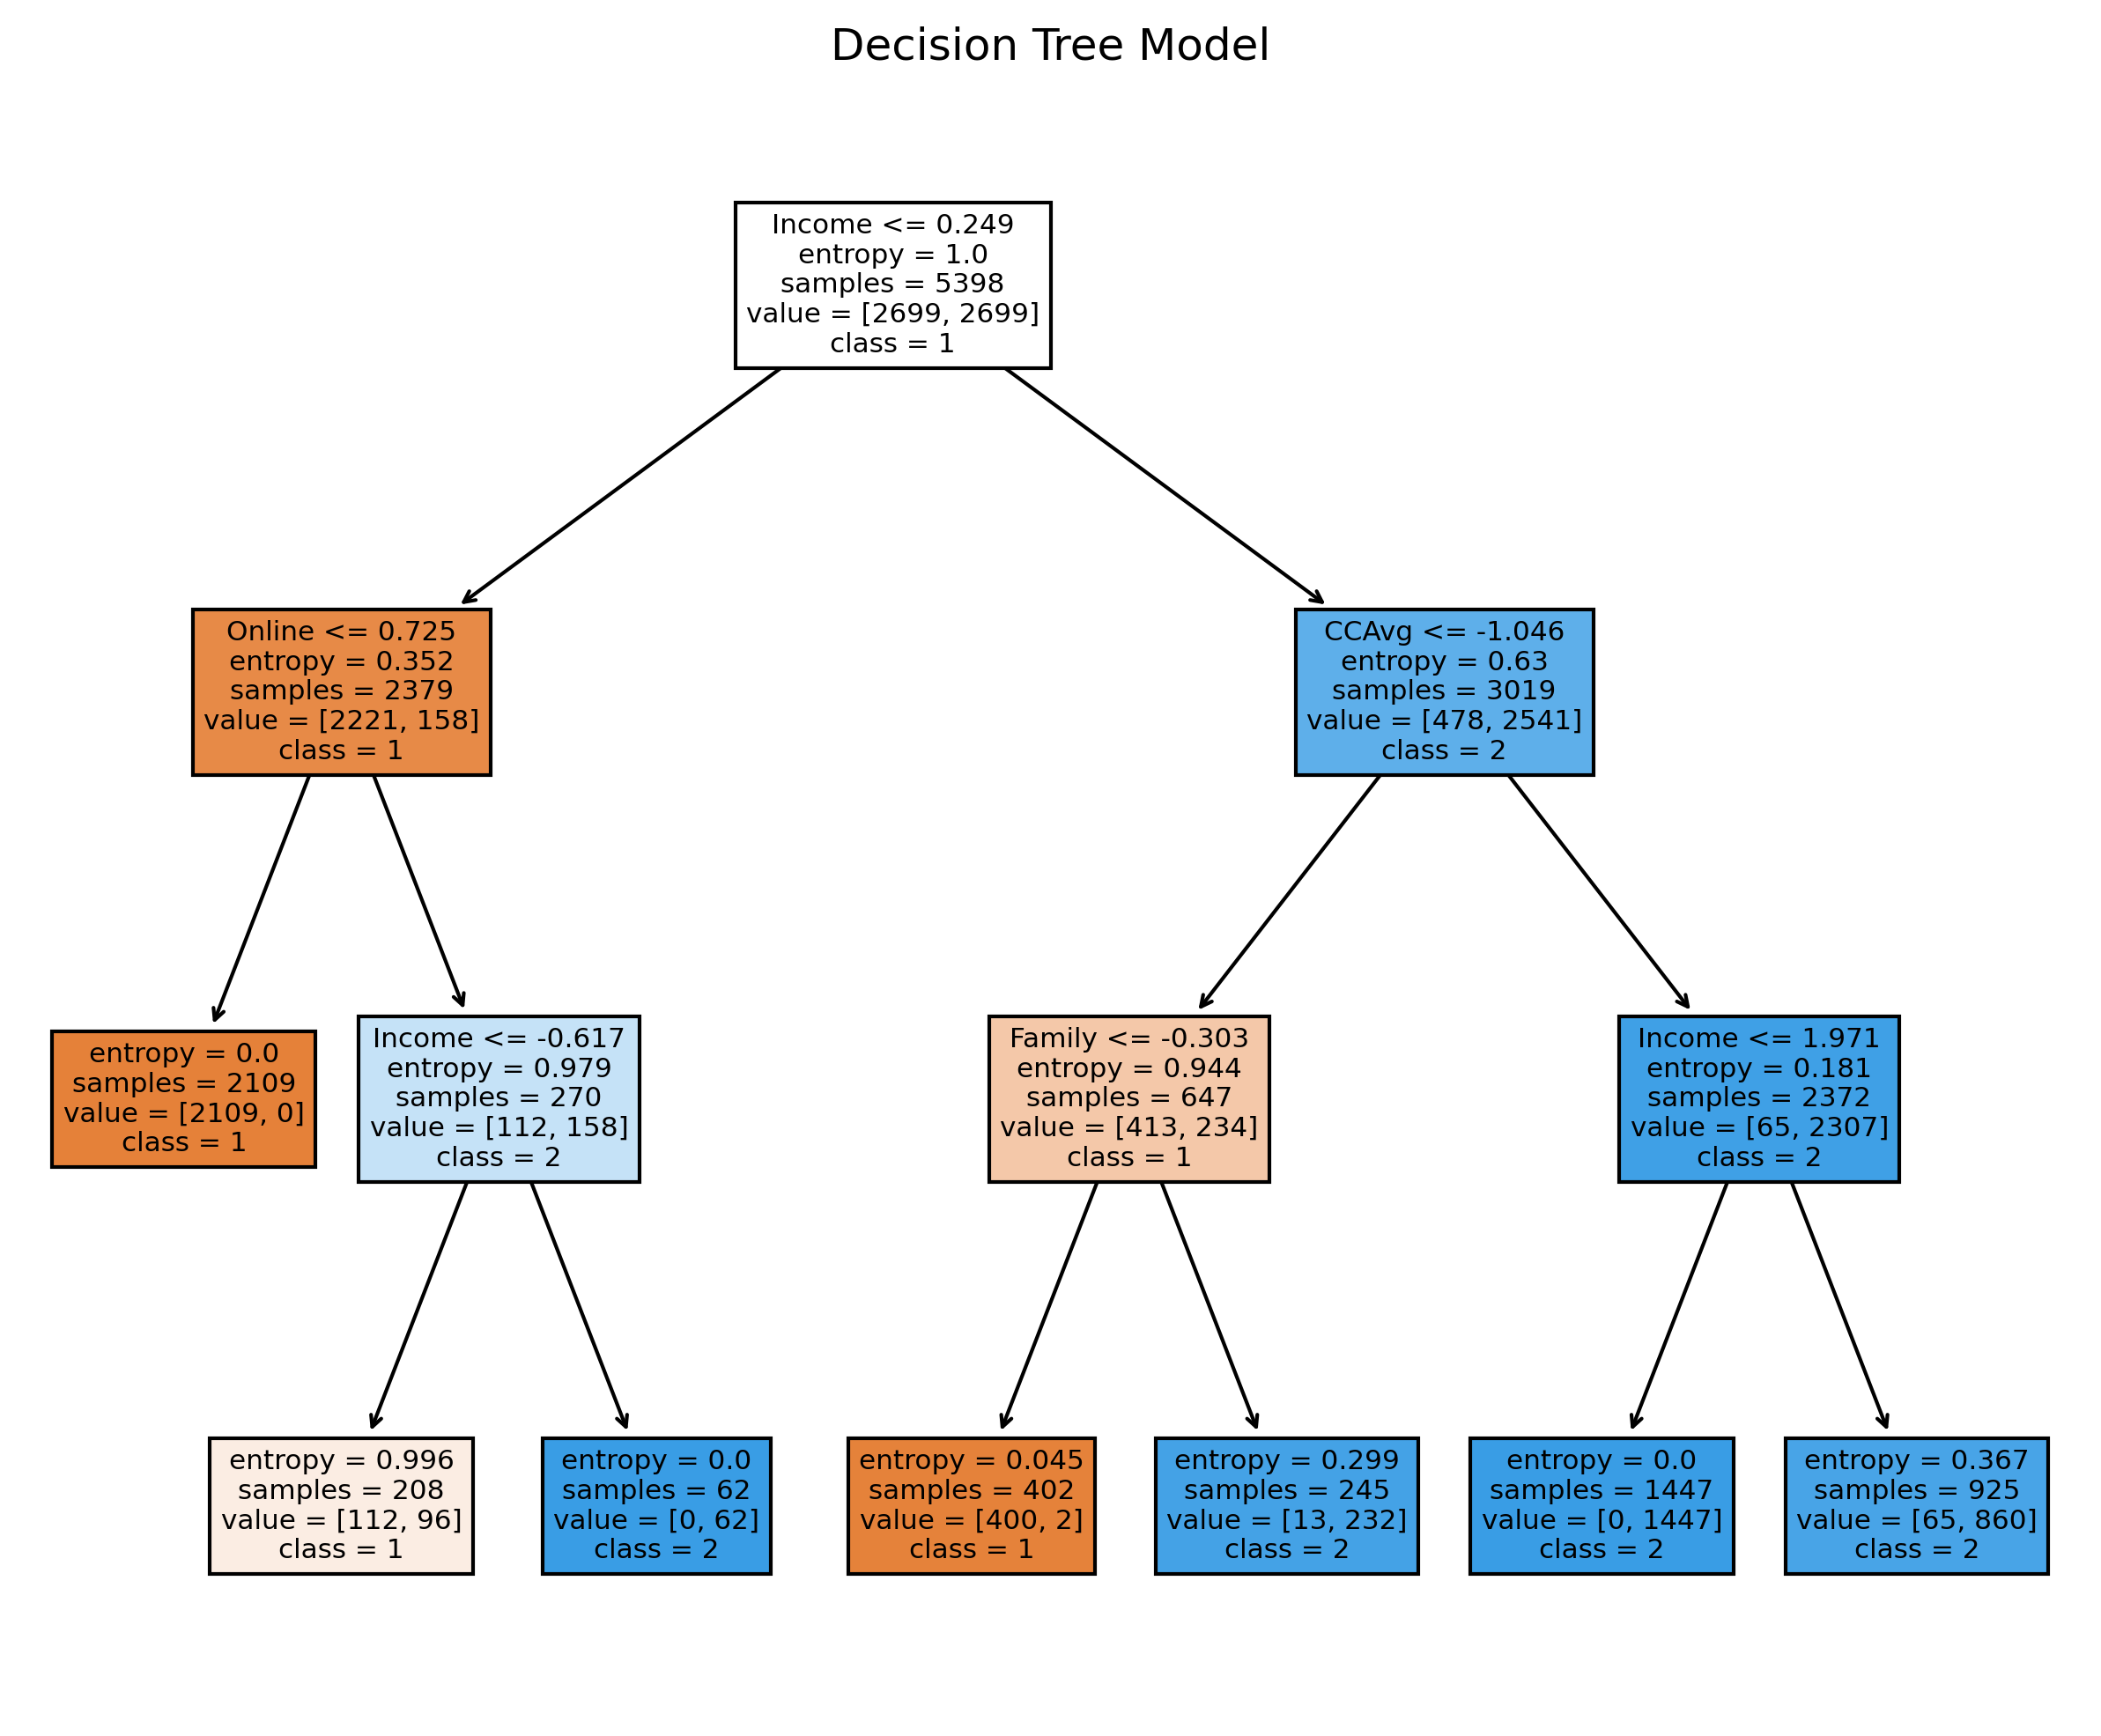

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

cn=["1","2"]
fn=['Age',	'Income',	'Family',	'CCAvg',	'Education',	'Mortgage',	'Securities.Account',	'CD.Account',	'Online',	'CreditCard','Age_r','Income_r'	]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
plot_tree(Decision_Tree, filled=True,feature_names = fn,class_names=cn)
plt.title("Decision Tree Model")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1_score= metrics.f1_score(y_test, y_pred_test, average='macro')

new=pd.Series({'Model': 'Decision Tree','Accuracy':accuracy,'Precision':precision,'Recall':recall, 'F1 Score': f1_score})
EVAL_SCORE=pd.concat([EVAL_SCORE,new.to_frame().T], ignore_index=True)
EVAL_SCORE

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.97193,0.901939,0.94376,0.921502


###### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_pred_train_rf = clf.predict(X_train)
y_pred_test_rf = clf.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_pred_train_rf)
print("Random Forest Training Accuracy :" ,round(train_accuracy,3)*100)

test_accuracy = accuracy_score(y_test, y_pred_test_rf)
print("Random Forest Testing Accuracy :" ,round(test_accuracy,3)*100)

Random Forest Training Accuracy : 91.2
Random Forest Testing Accuracy : 91.4


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test_rf)

# Add labels for better understanding
tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))

,Predicted Negative,Predicted Positive
Actual Negative,1808,0
Actual Positive,171,16


In [ ]:
print("Classification Report : \n" ,classification_report(y_test, y_pred_test_rf))

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1808
           1       1.00      0.09      0.16       187

    accuracy                           0.91      1995
   macro avg       0.96      0.54      0.56      1995
weighted avg       0.92      0.91      0.88      1995



In [ ]:
accuracy = accuracy_score(y_test, y_pred_test_rf)
precision = precision_score(y_test, y_pred_test_rf, average='macro')
recall = recall_score(y_test, y_pred_test_rf, average='macro')
f1_score= metrics.f1_score(y_test, y_pred_test_rf, average='macro')

new=pd.Series({'Model': 'Random Forest','Accuracy':accuracy,'Precision':precision,'Recall':recall, 'F1 Score': f1_score})
EVAL_SCORE=pd.concat([EVAL_SCORE,new.to_frame().T], ignore_index=True)
EVAL_SCORE

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.97193,0.901939,0.94376,0.921502
1,Random Forest,0.914286,0.956796,0.542781,0.55624


###### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_log=logistic_model.predict(X_test)

y_pred_train_log=logistic_model.predict(X_train)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_log)

# Add labels for better understanding
tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))

,Predicted Negative,Predicted Positive
Actual Negative,1776,32
Actual Positive,78,109


In [ ]:
print("Classification Report : \n" ,classification_report(y_test, y_pred_log))

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1808
           1       0.77      0.58      0.66       187

    accuracy                           0.94      1995
   macro avg       0.87      0.78      0.82      1995
weighted avg       0.94      0.94      0.94      1995



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f"Logistic Regression training Accuracy score: {accuracy_score(y_train,y_pred_train_log)*100:.1f}")

print(f"Logistic Regression testing Accuracy score: {accuracy_score(y_test,y_pred_log)*100:.1f}")

Logistic Regression training Accuracy score: 94.4
Logistic Regression testing Accuracy score: 94.5


Plot the ROC curve to better identify the threshold by which we would split our data

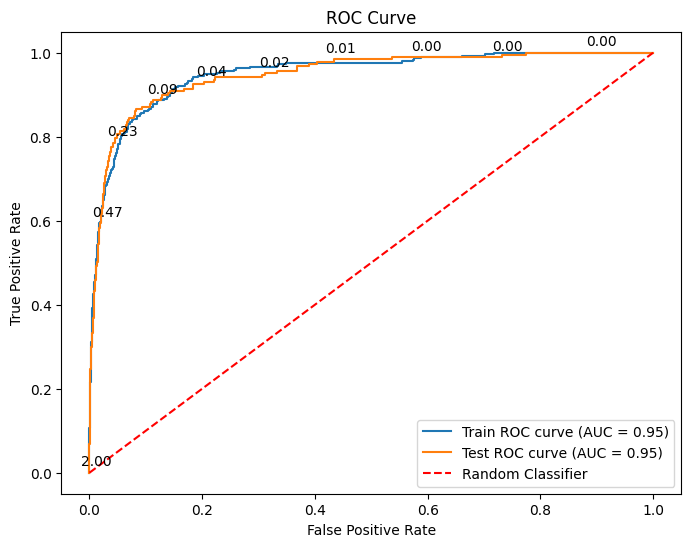

In [ ]:
from sklearn.metrics import roc_curve, auc

train_probs = logistic_model.predict_proba(X_train)[:, 1]
test_probs = logistic_model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test,thresholds_test = roc_curve(y_test, test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')

for i, threshold in enumerate(thresholds_test):
    if i % 50 == 0:
        plt.annotate(f'{threshold:.2f}', (fpr_test[i], tpr_test[i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Therefore, the best threshold would be at 0.04

In [ ]:
threshold=0.04
test_prob=logistic_model.predict_proba(X_test)
y_pred_test_log = (test_prob[:, 1] >= threshold).astype(int)

In [ ]:
print(f"Logistic Regression testing Accuracy score: {accuracy_score(y_test,y_pred_test_log)*100:.1f}")

Logistic Regression testing Accuracy score: 79.5


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test_log)

# Add labels for better understanding
tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))

,Predicted Negative,Predicted Positive
Actual Negative,1413,395
Actual Positive,13,174


In [ ]:
print("Classification Report : \n" ,classification_report(y_test, y_pred_test_log))

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.78      0.87      1808
           1       0.31      0.93      0.46       187

    accuracy                           0.80      1995
   macro avg       0.65      0.86      0.67      1995
weighted avg       0.93      0.80      0.84      1995



In [ ]:
accuracy = accuracy_score(y_test, y_pred_test_log)
precision = precision_score(y_test, y_pred_test_log, average='macro')
recall = recall_score(y_test, y_pred_test_log, average='macro')
f1_score= metrics.f1_score(y_test, y_pred_test_log, average='macro')


new=pd.Series({'Model': 'Logistic Regression','Accuracy':accuracy,'Precision':precision,'Recall':recall, 'F1 Score': f1_score})
EVAL_SCORE=pd.concat([EVAL_SCORE,new.to_frame().T], ignore_index=True)
EVAL_SCORE

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.97193,0.901939,0.94376,0.921502
1,Random Forest,0.914286,0.956796,0.542781,0.55624
2,Logistic Regression,0.795489,0.648342,0.856004,0.667079


###### K-NN Classifier Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, KFold

knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
kf = KFold(n_splits=10, random_state=5, shuffle=True)
y_pred_knn = cross_val_predict(knn, X, Y, cv=kf)

In [ ]:
knn.score(X_test, y_test)

0.9654135338345865

In [ ]:
k_values = range(1, 50)

#intialize 2 variables
best_k = 0
best_accuracy = 0

#iterate over the values of k and calculate the cross-validation for each, then calculate the
#accuracy and compare

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(n_splits=10, random_state=k, shuffle=True)
    y_pred = cross_val_predict(knn, X_test, y_test , cv=kf)

    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
#use cross-validation for the best k provided from the loop
final_knn = KNeighborsClassifier(n_neighbors=best_k)
kf = KFold(n_splits=10, random_state=best_k, shuffle=True)
y_pred_KNN = cross_val_predict(final_knn, X_test, y_test, cv=kf)

In [ ]:
accuracy_final = accuracy_score(y_test, y_pred_KNN)
precision_final = precision_score(y_test, y_pred_KNN, average='macro')
recall_final = recall_score(y_test, y_pred_KNN, average='macro')
f1_score_final = metrics.f1_score(y_test, y_pred_KNN, average='macro')

print(f"KNN Classification Results (Best k={best_k}):")
print(f"Accuracy: {accuracy_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall: {recall_final:.4f}")
print(f"F1 Score: {f1_score_final:.4f}")

KNN Classification Results (Best k=1):
Accuracy: 0.9579
Precision: 0.9004
Recall: 0.8377
F1 Score: 0.8657


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_KNN)

# Add labels for better understanding
tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))

,Predicted Negative,Predicted Positive
Actual Negative,1782,26
Actual Positive,58,129


In [ ]:
new=pd.Series({'Model': 'KNN','Accuracy':accuracy_final,'Precision':precision_final,'Recall':recall_final, 'F1 Score': f1_score_final})
EVAL_SCORE=pd.concat([EVAL_SCORE,new.to_frame().T], ignore_index=True)
EVAL_SCORE

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.97193,0.901939,0.94376,0.921502
1,Random Forest,0.914286,0.956796,0.542781,0.55624
2,Logistic Regression,0.795489,0.648342,0.856004,0.667079
3,KNN,0.957895,0.900368,0.83773,0.86568


###### Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

y_pred_LR=linreg.predict(X_test)
print('MSE (test): {:.3f}'
     .format(mean_squared_error(y_test, y_pred_LR)))

linear model coeff (w): [ 0.0012687   0.12153754  0.03314016  0.0692639  -0.02473848  0.08327756
 -0.01189204 -0.0238903   0.04392314  0.01244949]
linear model intercept (b): 0.096
R-squared score (training): 0.356
R-squared score (test): 0.369
MSE (test): 0.054


We won't be able to add it to our evaluation table since linear regression is assessed by MSE and R^2 which are provided above rather than accuracy, precision, recall, and F1 score

###### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB()
nbclf.fit(X_train, y_train)

GaussianNB()

In [ ]:
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Accuracy of GaussianNB classifier on training set: 0.89
Accuracy of GaussianNB classifier on test set: 0.91


In [ ]:
y_pred_NB=nbclf.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_NB)

# Add labels for better understanding
tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))

,Predicted Negative,Predicted Positive
Actual Negative,1718,90
Actual Positive,81,106


In [ ]:
accuracy = accuracy_score(y_test, y_pred_NB)
precision = precision_score(y_test, y_pred_NB, average='macro')
recall = recall_score(y_test, y_pred_NB, average='macro')
f1_score= metrics.f1_score(y_test, y_pred_NB, average='macro')

new=pd.Series({'Model': 'Naive Bayes','Accuracy':accuracy,'Precision':precision,'Recall':recall, 'F1 Score': f1_score})
EVAL_SCORE=pd.concat([EVAL_SCORE,new.to_frame().T], ignore_index=True)
EVAL_SCORE

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.97193,0.901939,0.94376,0.921502
1,Random Forest,0.914286,0.956796,0.542781,0.55624
2,Logistic Regression,0.795489,0.648342,0.856004,0.667079
3,KNN,0.957895,0.900368,0.83773,0.86568
4,Naive Bayes,0.914286,0.747896,0.758533,0.753058


##### Assessing our Models

In [ ]:
EVAL_SCORE

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.97193,0.901939,0.94376,0.921502
1,Random Forest,0.914286,0.956796,0.542781,0.55624
2,Logistic Regression,0.795489,0.648342,0.856004,0.667079
3,KNN,0.957895,0.900368,0.83773,0.86568
4,Naive Bayes,0.914286,0.747896,0.758533,0.753058


Sorting our evaluation table descendingly according to the F1 score

In [ ]:
EVAL_SCORE.sort_values(by='F1 Score', inplace = True, ascending= False)
EVAL_SCORE

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.97193,0.901939,0.94376,0.921502
3,KNN,0.957895,0.900368,0.83773,0.86568
4,Naive Bayes,0.914286,0.747896,0.758533,0.753058
2,Logistic Regression,0.795489,0.648342,0.856004,0.667079
1,Random Forest,0.914286,0.956796,0.542781,0.55624


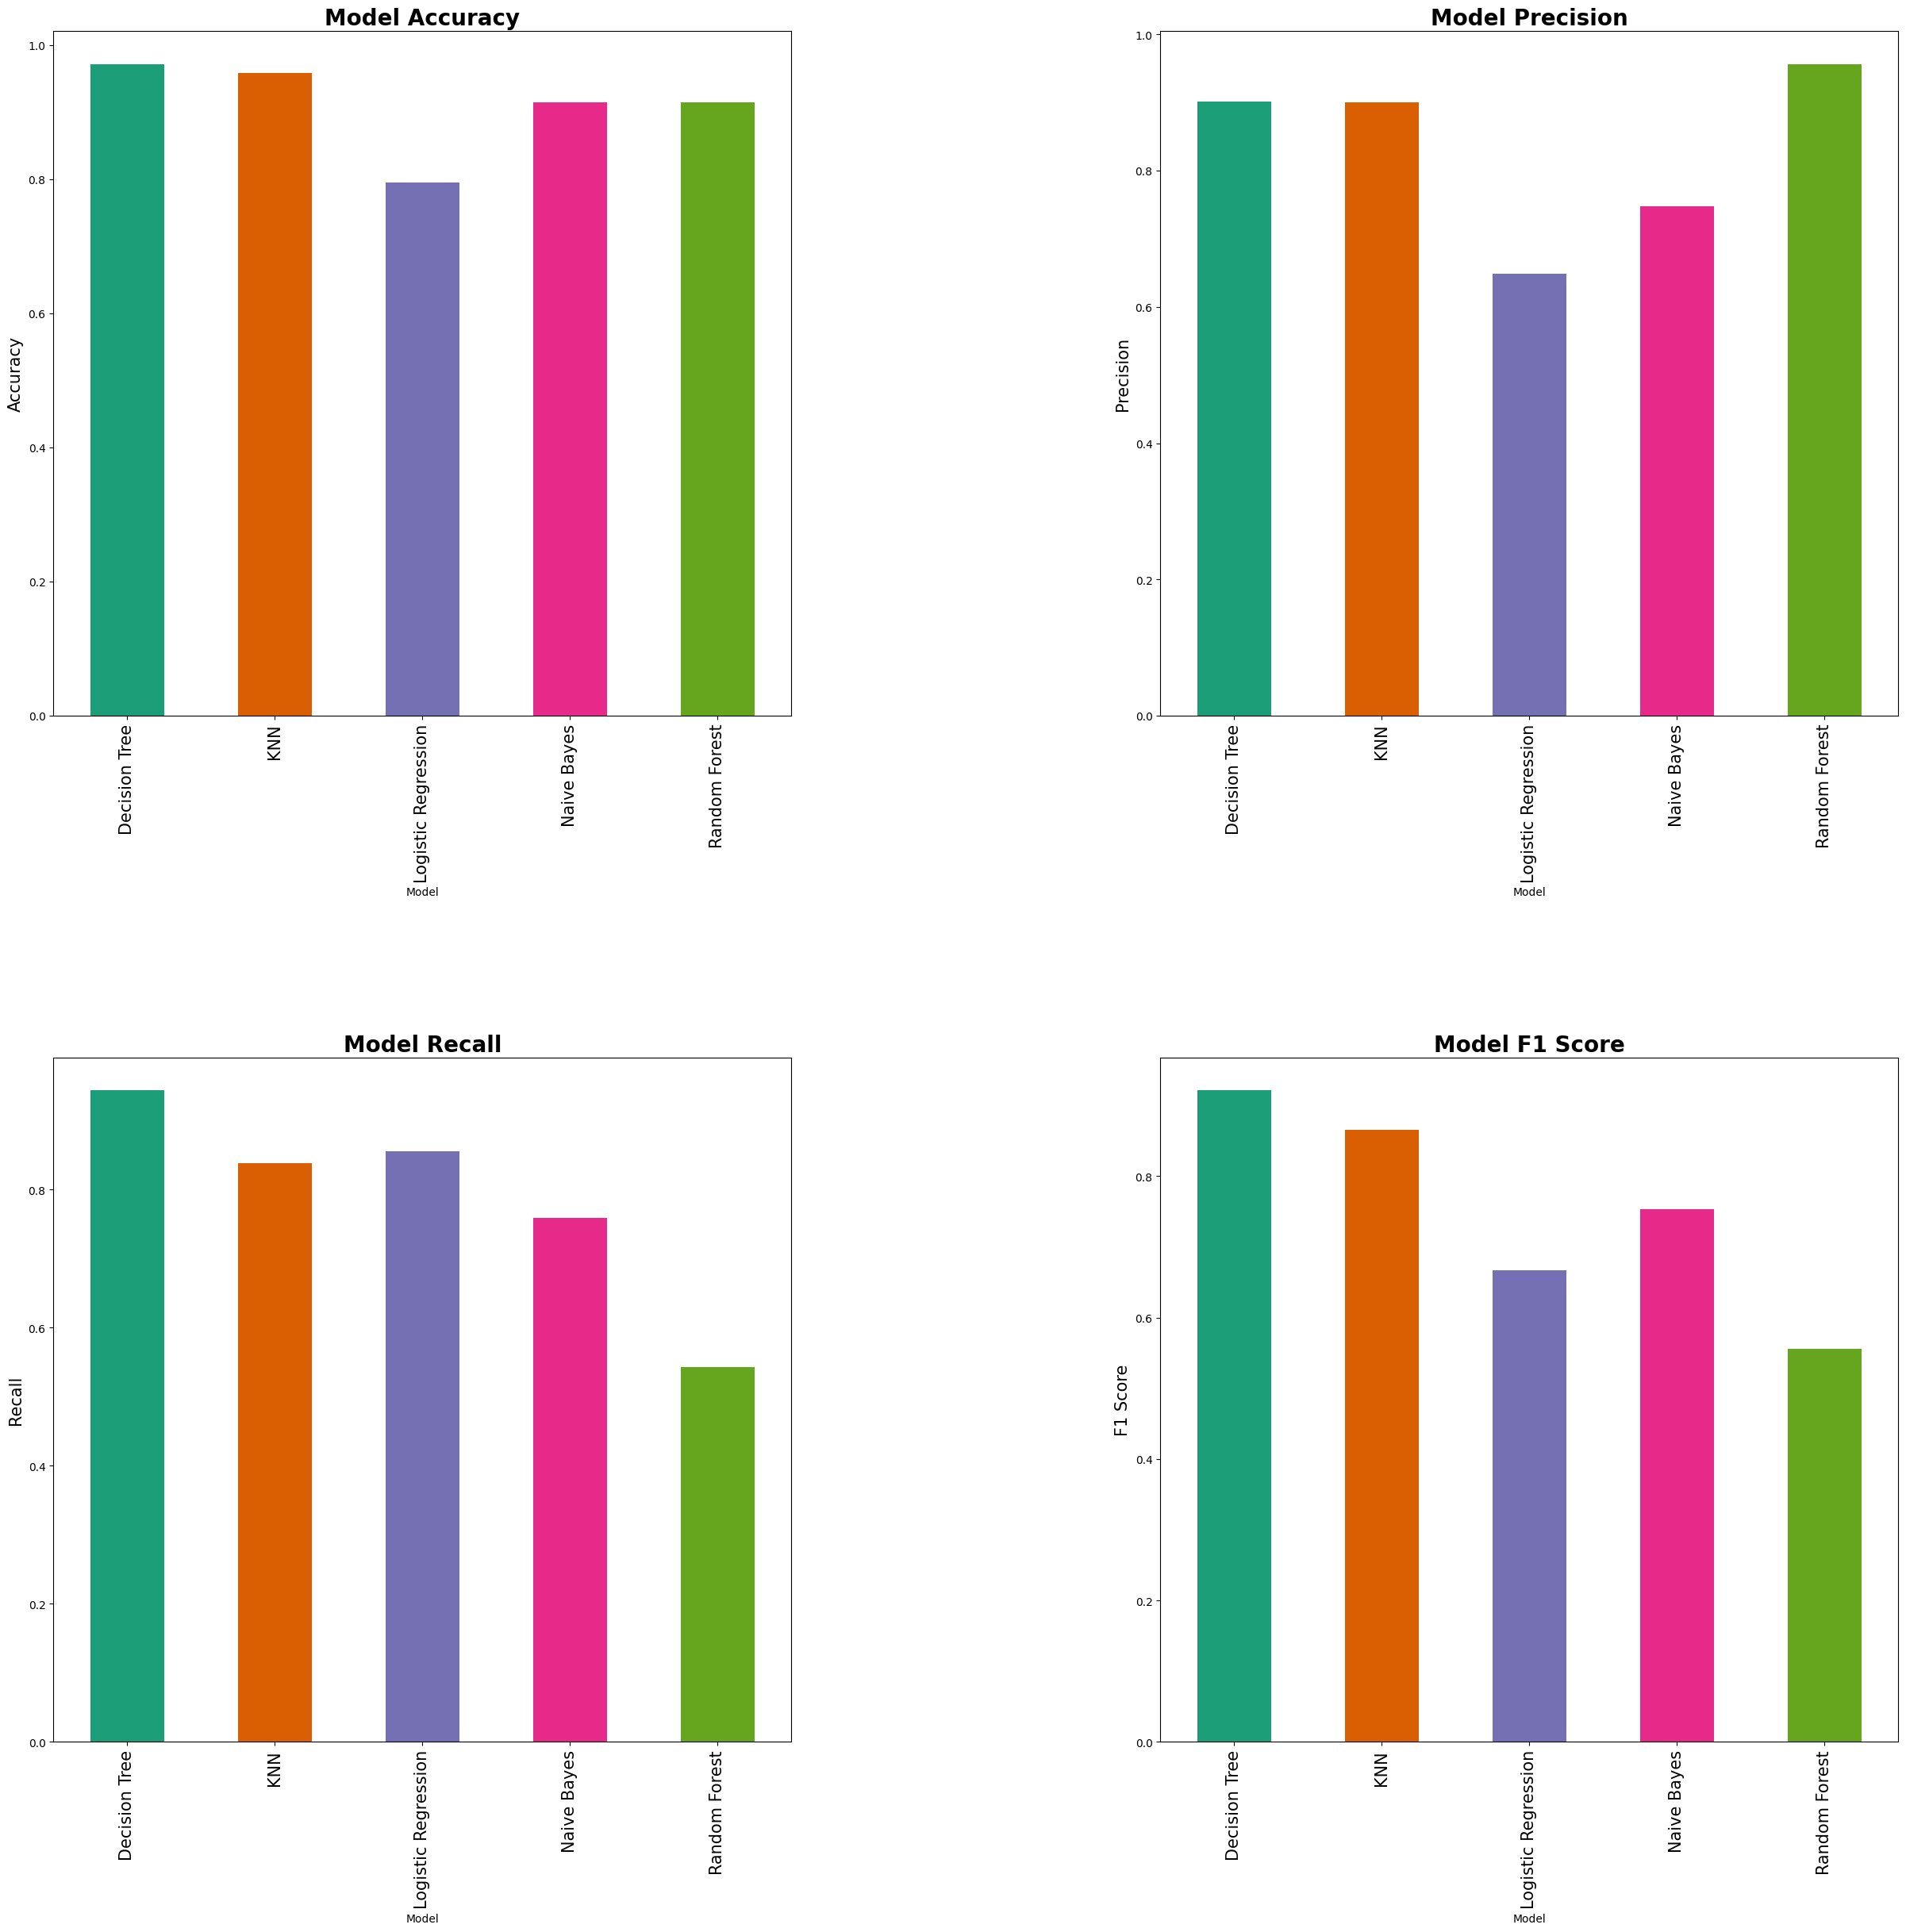

In [ ]:
plt.figure(figsize=(30,28))
plt.subplot(2,2,1)

acc = EVAL_SCORE.groupby('Model')['Accuracy'].mean()
acc.plot(kind='bar',color=sns.palettes.mpl_palette('Dark2'))
plt.xticks(fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Model Accuracy',fontsize=20, fontweight="bold")

plt.subplot(2,2,2)

pr = EVAL_SCORE.groupby('Model')['Precision'].mean()
pr.plot(kind='bar',color=sns.palettes.mpl_palette('Dark2'))
plt.xticks(fontsize=15)
plt.ylabel('Precision',fontsize=15)
plt.title('Model Precision',fontsize=20, fontweight="bold")

plt.subplot(2,2,3)

rc = EVAL_SCORE.groupby('Model')['Recall'].mean()
rc.plot(kind='bar',color=sns.palettes.mpl_palette('Dark2'))
plt.xticks(fontsize=15)
plt.ylabel('Recall',fontsize=15)
plt.title('Model Recall',fontsize=20, fontweight="bold")

plt.subplot(2,2,4)

f1 = EVAL_SCORE.groupby('Model')['F1 Score'].mean()
f1.plot(kind='bar',color=sns.palettes.mpl_palette('Dark2'))
plt.xticks(fontsize=15)
plt.ylabel('F1 Score',fontsize=15)
plt.title('Model F1 Score',fontsize=20, fontweight="bold")

plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()